In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

import warnings 
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/SeoulHangangB.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
train = pd.read_csv('dataset/train_date.csv')

In [3]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '년', '월', '일'],
      dtype='object')

## 식사가능자

In [4]:
train['식사가능자'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

## 전주식계

In [5]:
from datetime import timedelta
train['전주중식계'] = 0
train['전주석식계'] = 0
idx = pd.DatetimeIndex(train['일자']) + timedelta(weeks=-1)
for i in range(len(train)):
    try:
        train['전주중식계'][i] = train[train['일자'] == str(idx[i])[:10]]['중식계']
        train['전주석식계'][i] = train[train['일자'] == str(idx[i])[:10]]['석식계']
    except:
        train['전주중식계'][i] = train.iloc[i,:]['중식계']
        train['전주석식계'][i] = train.iloc[i,:]['석식계']

train[['중식계', '전주중식계', '석식계', '전주석식계', '일자']].head(10)

,중식계,전주중식계,석식계,전주석식계,일자
0,1039.0,1039,331.0,331,2016-02-01
1,867.0,867,560.0,560,2016-02-02
2,1017.0,1017,573.0,573,2016-02-03
3,978.0,978,525.0,525,2016-02-04
4,925.0,925,330.0,330,2016-02-05
5,1045.0,978,550.0,525,2016-02-11
6,909.0,925,598.0,330,2016-02-12
7,1268.0,1268,672.0,672,2016-02-15
8,1014.0,1014,523.0,523,2016-02-16
9,916.0,916,588.0,588,2016-02-17


## 요일 평균 중식계

<AxesSubplot:xlabel='요일', ylabel='중식계'>

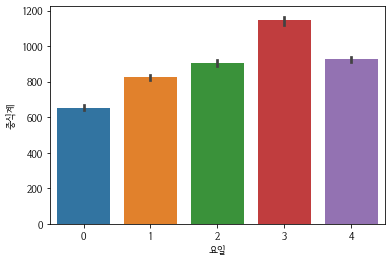

In [20]:
sns.barplot(x='요일', y='중식계', data=train)

<AxesSubplot:xlabel='요일', ylabel='석식계'>

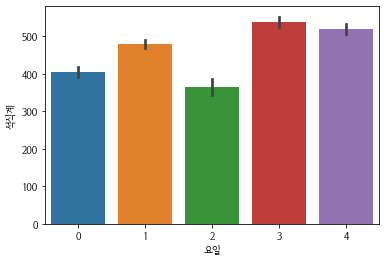

In [75]:
sns.barplot(x='요일', y='석식계', data=train)

In [53]:
train.groupby('요일').mean()['중식계'].values

array([ 653.60995851,  823.99180328,  905.21338912, 1144.33195021,
        925.62083333])

In [74]:
train.groupby('요일').mean()['석식계'].values

array([404.97925311, 480.40163934, 363.61506276, 538.93360996,
       520.12916667])

In [6]:
train['요일평균중식계'] = 0
tmp = train.groupby('요일').mean()['중식계'].values
for i in range(len(tmp)):
    train['요일평균중식계'][train['요일'] == i] = tmp[i]

In [7]:
train['요일평균석식계'] = 0
tmp = train.groupby('요일').mean()['석식계'].values
for i in range(len(tmp)):
    train['요일평균석식계'][train['요일'] == i] = tmp[i]

## 월평균 식계

<AxesSubplot:xlabel='월', ylabel='중식계'>

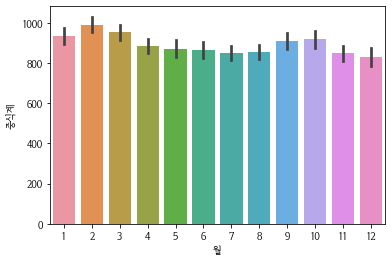

In [91]:
sns.barplot(x='월', y='중식계', data=train)

<AxesSubplot:xlabel='월', ylabel='석식계'>

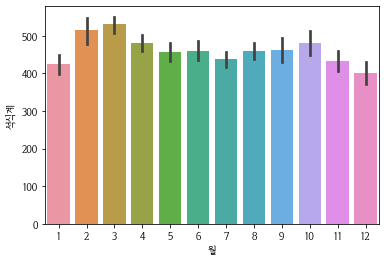

In [96]:
sns.barplot(x='월', y='석식계', data=train)

In [93]:
train.groupby('월').mean()['중식계'].values

array([934.24752475, 989.62365591, 953.60747664, 883.62135922,
       869.78787879, 863.31111111, 848.73636364, 854.78504673,
       907.14893617, 917.77173913, 847.33333333, 827.33663366])

In [94]:
train.groupby('월').mean()['석식계'].values

array([424.56435644, 514.86021505, 530.70093458, 480.82524272,
       458.13131313, 460.35555556, 437.3       , 459.48598131,
       463.61702128, 481.64130435, 434.25      , 401.16831683])

In [8]:
train['월평균중식계'] = 0
tmp = train.groupby('월').mean()['중식계']
tmp_k = tmp.keys(); tmp_v = tmp.values
for i in tmp_k:
    train['월평균중식계'][train['월'] == i] = tmp_v[i-1]

In [9]:
train['월평균석식계'] = 0
tmp = train.groupby('월').mean()['석식계']
tmp_k = tmp.keys(); tmp_v = tmp.values
for i in tmp_k:
    train['월평균석식계'][train['월'] == i] = tmp_v[i-1]

## 공휴일전후

In [11]:
#공휴일 지정 노가다
train['공휴일전후'] = 0

train['공휴일전후'][17] = 1
train['공휴일전후'][3] = 1
train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후'][152] = 1
train['공휴일전후'][226] = 1
train['공휴일전후'][221] = 1
train['공휴일전후'][224] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후'][310] = 1
train['공휴일전후'][311] = 1
train['공휴일전후'][309] = 1
train['공휴일전후'][330] = 1
train['공휴일전후'][379] = 1
train['공휴일전후'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후'][470] = 1
train['공휴일전후'][502] = 1
# train['공휴일전후'][501] = 1
# train['공휴일전후'][511] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][623] = 1
train['공휴일전후'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후'][705] = 1
# train['공휴일전후'][707] = 1
train['공휴일전후'][709] = 1
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 1
train['공휴일전후'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후'][950] = 1
train['공휴일전후'][951] = 1
train['공휴일전후'][953] = 1
train['공휴일전후'][954] = 1
train['공휴일전후'][955] = 1
train['공휴일전후'][971] = 1
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1099] = 1
train['공휴일전후'][1129] = 1
# train['공휴일전후'][1128] = 1
train['공휴일전후'][1187] = 1
# train['공휴일전후'][1186] = 1

## 자기계발의날

In [26]:
train['자기계발의날'] = 0

In [28]:
train['자기계발의날'].loc[(train['석식계'] == 0) & (train['공휴일전후'] == 0) & (train['요일'] == 2)] = 1

# 저장

In [113]:
train.to_csv('dataset/data/train.csv', index=False)

# 상관성 분석

<AxesSubplot:>

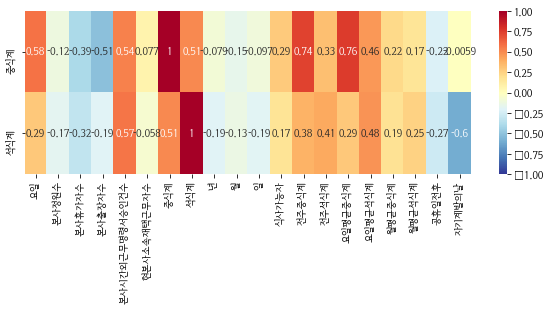

In [33]:
plt.figure(figsize=(10, 3))
tmp = train.corr().loc[['중식계', '석식계']]
sns.heatmap(tmp,
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [34]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '년', '월', '일',
       '식사가능자', '전주중식계', '전주석식계', '요일평균중식계', '요일평균석식계', '월평균중식계', '월평균석식계',
       '공휴일전후', '자기계발의날'],
      dtype='object')

In [36]:
def get_stats(df, columns, y):
    x = df[columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())

y = train['석식계']
cols = ['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '석식계', '식사가능자', '전주중식계', '전주석식계', '요일평균중식계', 
        '요일평균석식계', '월평균중식계', '월평균석식계']
get_stats(train, cols, y)

                                 OLS Regression Results                                
Dep. Variable:                    석식계   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.417e+30
Date:                Sun, 18 Jul 2021   Prob (F-statistic):                        0.00
Time:                        14:38:59   Log-Likelihood:                          30482.
No. Observations:                1205   AIC:                                 -6.094e+04
Df Residuals:                    1192   BIC:                                 -6.087e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------